### Group members: William Gerle & Alfred Kjeller

# Imports

In [1]:
# Supress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Imports
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

# Task 1: Working with a dataset with categorical features

## Step 1. Reading the data.

In [2]:
# Read the CSV files.
data_train = pd.read_csv('adult_train.csv')
data_test = pd.read_csv('adult_test.csv')

# Remove missing values
data_train = data_train.dropna()
data_test = data_test.dropna()

# Shuffle the datasets.
data_train = data_train.sample(frac=1.0, random_state=0)
data_test = data_test.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X_train = data_train.drop('target', axis=1)
X_test = data_test.drop('target', axis=1)

# Add ouput to dataframe
Y_train = data_train['target']
Y_test = data_test['target']

X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
22278,49,Local-gov,110172,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
8950,49,Private,105431,HS-grad,9,Divorced,Other-service,Not-in-family,Black,Female,0,0,40,United-States
7838,31,Private,34374,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
16505,53,Private,191025,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,43,United-States
19140,30,Private,108247,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States


## Step 2: Encoding the features as numbers.

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

dv = DictVectorizer()

# Encode training data
dicts_for_my_training_data = X_train.to_dict('records')
X_train_encoded = dv.fit_transform(dicts_for_my_training_data)

# Encode test data
dicts_for_my_test_data = X_test.to_dict('records')
X_test_encoded = dv.transform(dicts_for_my_test_data)

# Classify using DecisionTreeClassifier
print('Validation accuracy: {} %'.format(round(cross_val_score(DecisionTreeClassifier(random_state = 0), X_train_encoded, Y_train).mean() * 100, 2)))

clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train_encoded, Y_train)
Y_guess = clf.predict(X_test_encoded)
print('Test accuracy: {} %'.format(round(accuracy_score(Y_test, Y_guess) * 100, 2)))



Validation accuracy: 81.65 %
Test accuracy: 81.24 %


## Step 3. Combining the steps.

In [4]:
from sklearn.pipeline import make_pipeline

# Create pipeline
pipeline = make_pipeline(
  DictVectorizer(),
  DecisionTreeClassifier(random_state=0)
)   

# Test pipeline
pipeline.fit(X_train.to_dict('records'), Y_train)
print('Test accuracy: {} %'.format(round(pipeline.score(X_test.to_dict('records'), Y_test) * 100, 2)))


Test accuracy: 81.24 %


# Task 2: Decision trees and random forests

## Step 1 Underfitting and overfitting in decision tree classifiers.

In [24]:
from datetime import datetime

train_score_dec = []
test_score_dec = []

# Generate decision trees with max_depth 1-20
for i in range(1, 21):
    clf = DecisionTreeClassifier(random_state = 0, max_depth = i)
    train_score_dec.append(cross_val_score(clf, X_train_encoded, Y_train).mean())
    clf.fit(X_train_encoded, Y_train)
    Y_guess = clf.predict(X_test_encoded)
    test_score_dec.append(accuracy_score(Y_test, Y_guess))
    print('[{}]  {}/20 Done'.format(datetime.now().strftime("%H:%M:%S"), i))

[13:04:40]  1/20 Done
[13:04:40]  2/20 Done
[13:04:41]  3/20 Done
[13:04:41]  4/20 Done
[13:04:42]  5/20 Done
[13:04:43]  6/20 Done
[13:04:44]  7/20 Done
[13:04:46]  8/20 Done
[13:04:49]  9/20 Done
[13:04:51]  10/20 Done
[13:04:53]  11/20 Done
[13:04:56]  12/20 Done
[13:04:59]  13/20 Done
[13:05:03]  14/20 Done
[13:05:07]  15/20 Done
[13:05:12]  16/20 Done
[13:05:17]  17/20 Done
[13:05:22]  18/20 Done
[13:05:28]  19/20 Done
[13:05:33]  20/20 Done


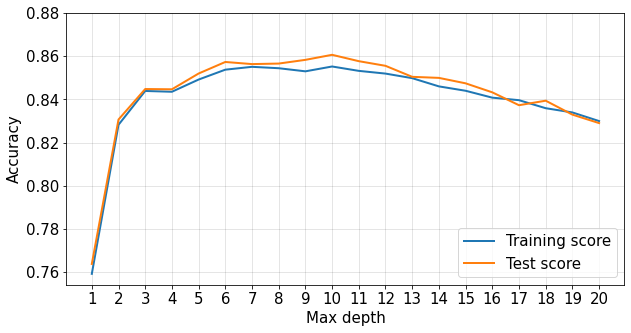

In [25]:
# Plot Validation accuracy and test accuracy based on max_depth
plt.figure(figsize=(10,5))
plt.plot(train_score_dec, linewidth=2)
plt.plot(test_score_dec, linewidth=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Max depth', fontsize=15)
plt.legend(['Training score', 'Test score'], loc='lower right', fontsize=15)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.1)
plt.xticks(np.arange(len(train_score_dec)), np.arange(1, len(train_score_dec)+1))
plt.yticks(np.arange(0.76, 0.89, 0.02))
plt.show()


The curve shows a similar effect as the curve in the previous assignment. The accuracy increases with higher max depth and then it reverses, and the accuracy drops with higher max depth. In the previous assignment we had a clear gap between the validation accuracy and the test accuracy. In this assignment is it not a clear gap, instead the test accuracy is higher than the validation accuracy for some depth levels, and opposite for others.  The clear difference between the validation accuracy and the test accuracy in the previous assignment was discussed to be potentially a result of the used data. The training data could have contained some noise that the model paid too much attention to or perhaps the training data could have missed some tendencies that were common in general. This assignment uses classification instead of regression and does also have a different dataset. This could explain that the same tendency is not shown.

## Step 2 Underfitting and overfitting in random forest classifiers.

In [7]:
from sklearn.ensemble import RandomForestClassifier

train_score = []
test_score = []
tree_numbers = [1, 10, 50, 100, 200]

# Run through all esitmator sizes.
for i in tree_numbers:
    tmp_train_score = []
    tmp_test_score = []
    
    # Run through max_depth 1-20
    for j in range(1, 21):
        clf = RandomForestClassifier(random_state = 0, max_depth = j, n_estimators = i)
        score = cross_val_score(clf, X_train_encoded, Y_train).mean()
        tmp_train_score.append(score)
        clf.fit(X_train_encoded, Y_train)
        Y_guess = clf.predict(X_test_encoded)
        tmp_test_score.append(accuracy_score(Y_test, Y_guess))

    train_score.append(tmp_train_score)
    test_score.append(tmp_test_score)
    print('[{}]  {} Done'.format(datetime.now().strftime("%H:%M:%S"), i)) # Log feature

[12:16:04]  1 Done
[12:17:01]  10 Done
[12:21:22]  50 Done
[12:30:00]  100 Done
[12:46:42]  200 Done


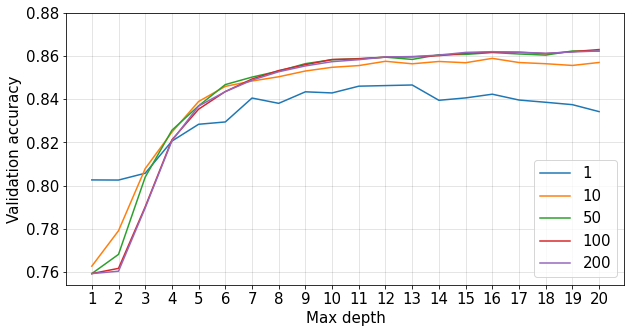

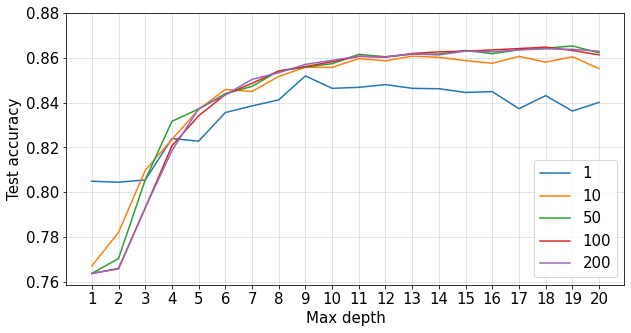

In [21]:
# Plot validation accuracy
plt.figure(figsize=(10,5))
for x in train_score:
    plt.plot(x)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Validation accuracy', fontsize=15)
plt.xlabel('Max depth', fontsize=15)
plt.legend(tree_numbers, loc='lower right', fontsize=15)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.1)
plt.xticks(np.arange(len(train_score[0])), np.arange(1, len(train_score[0])+1))
plt.yticks(np.arange(0.76, 0.89, 0.02))
plt.show()

# Plot test accuracy
plt.figure(figsize=(10,5))
for x in test_score:
    plt.plot(x)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Test accuracy', fontsize=15)
plt.xlabel('Max depth', fontsize=15)
plt.legend(tree_numbers, loc='lower right', fontsize=15)
plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.1)
plt.xticks(np.arange(len(test_score[0])), np.arange(1, len(test_score[0])+1))
plt.yticks(np.arange(0.76, 0.89, 0.02))
plt.show()

### Discussion

- A decision tree with an ensemble size of 1 is similar to a regular decision tree except it only uses a subset of the original dataset and only uses a random subset of features at each step of the tree. These aspects make random forest a highly accurate and generalizable classifier as the ensemble size grows. However, when the ensemble size is 1 these aspects lead to lower accuracy compared to a regular decision tree which is shown in the graph. A potential reason for this is that the regular decision tree has access to all the available data and all the available features, which the random forest does not.

- As earlier mentioned, the accuracy curve for the random forest increases as the ensembles size grows. The reason for this is partly because there is a lower risk of features or data points being entirely left out from the classifier. With a low ensemble size there is a risk that the subsets used perhaps only contains outliers or features with a low correlation to the target value, hence creating a classifier with low accuracy.
However, the training time also increases a lot as the ensembles size grows since generating more trees takes longer time. Therefore, when choosing the ensemble size, one has to consider the tradeoff between training time and accuracy. As the graph shows, initial increases of the ensemble size result in a large increase in accuracy, however, this effect slowly drops of as the random forest grows above circa 50 trees. Consequently, in our opinion, there seems to be a threshold from which increasing the ensemble size does not increase the accuracy and only increases the training time.

# Task 3: Feature importances in random forest classifiers

In [9]:
# Create and fit random forest
clf = RandomForestClassifier(random_state = 0, max_depth = 10, n_estimators = 100)
clf.fit(X_train_encoded, Y_train)

# Take out the ten most important features
feature = pd.DataFrame()
feature['Name'] = dv.feature_names_
feature['Importance'] = clf.feature_importances_
feature = feature.sort_values(by=['Importance'], ascending=False)
pd.options.display.float_format = '{:.5f}'.format
feature.head(n=10)

,Name,Importance
24,marital-status=Married-civ-spouse,0.14903
1,capital-gain,0.14611
91,relationship=Husband,0.10952
3,education-num,0.09823
0,age,0.05676
26,marital-status=Never-married,0.04820
21,hours-per-week,0.04300
2,capital-loss,0.03672
81,occupation=Prof-specialty,0.03004
75,occupation=Exec-managerial,0.02845


### Discussion

The five most important features for the dataset used in this assignment are capital-gain, marital-status=Married-civ-spouse, relationship=Husband, education-num and age. Below, for each feature, we have reasoned why we believe the feature is important.
- **Capital-gain**: In our opinion there is a high possibility that high earners also have more capital and contrary low earners have less capital. Since high earners earn more, they have more money to invest, hence having higher capital gains. Consequently, this feature can be used to create good splits.
- **Marital-status=Married-civ-spouse**: To determine why this feature is important was more difficult in our opinion. One thought we had was that married people perhaps often has a lot of expenses related to family, housing etc. Therefore, they have a bigger desire to earn more to cover these expenses, and on the contrary single persons do not. Married people are often also of higher age which is explained below why it could contribute to higher earnings.
- **Relationship=Husband**: Our reasoning why this feature is important is similar to the Marital-status=Married-civ-spouse. Firstly, since this feature also reveals gender, we thought that this also might be important. However, since the features male/female did not have a significant importance difference, this was not the case in our opinion.
- **Education-num**: Educated people can often do more complex tasks hence are often compensated with a higher wage. On the contrary, we believe that un-educated people often have less complex jobs with lower wages.
- **Age**: The older you are, the more years you have had to get experienced and hence earn a higher wage. Older persons also have had more time to accumulate capital and receive capital gains.


An alternative way to compute some sort of importance score of individual features is *Drop-column importance* as mentioned by Parr et al. (2018). The way this works is that firstly a random forest is created. The accuracy from this model is the baseline score. The next step is to remove one column from the dataset and then create a new random forest with the new dataset. The baseline score is then compared with the new score. A small difference in scores indicates that the feature is not important, since an important feature is a feature that is needed to get a high accuracy score. Therefore, a lower score on the new model compared to the baseline, indicates that the dropped feature was important. If the new accuracy is higher than the baseline score, the feature removed must be bad. It probably contains values that does not correlate at all with the predicted value. This procedure is repeated for all features, which makes it possible to rank the features based on importance. A downside to this method is the computational power required. Creating random forest can be computational expensive and this method requires multiple random forests to be created.